### Student Information
Name: Apoorv Saxena

Student ID: 109062423

GitHub ID:ApoorvSaxena0109

Kaggle name: a        (in Leaderboard)

Kaggle private scoreboard snapshot:
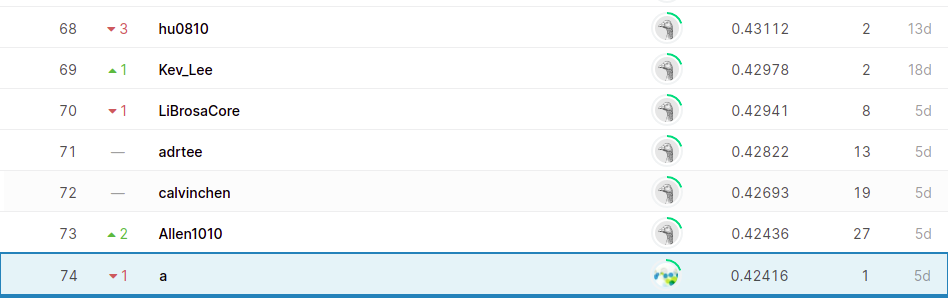

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [23]:
### Begin Assignment Here
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [24]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [25]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


# Excercise 1

In [26]:
# Answer here
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()
train_dataset_counts = train_count_vect.fit_transform(train_df.text)
test_dataset_counts = test_count_vect.fit_transform(test_df.text)
train_term_frequencies = np.asarray(train_dataset_counts.sum(axis=0))[0]
test_term_frequencies = np.asarray(test_dataset_counts.sum(axis=0))[0]
df = pd.DataFrame(train_term_frequencies[:30])
tf = pd.DataFrame((df).values,index=train_count_vect.get_feature_names_out()[:30], columns={"term_frequency"})
fig = px.line(tf, y="term_frequency", x=train_count_vect.get_feature_names_out()[:30])
print(fig.show())



None


In [27]:
df = pd.DataFrame(train_term_frequencies[:30])
tf = pd.DataFrame((df).values,index=train_count_vect.get_feature_names_out()[:30], columns={"term_frequency"})
fig = px.line(tf, y="term_frequency", x=train_count_vect.get_feature_names_out()[:30])
fig.show()

# Excercise 2

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/apoorv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
trainf = tfidf.fit_transform(train_df['text'])
testf = tfidf.transform(test_df['text'])
trainf.shape

(3613, 1000)

In [30]:
feature_names_tfidf = tfidf.get_feature_names()
feature_names_tfidf[100:110]

/home/apoorv/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday', 'be']

# Excercise 3

the model had a greater accuracy in predicting data labeled 'joy.'
the performing class in the sadness label is poor. 
The model has a very high chances of predicting fear.
The model predicts - 59 anger , 72 fear , 51 joy , 48 sadness .

Because of the overfitting problem, the decision tree remembered multiple critical terms, causing the prediction to be inadequate as we  can see there is a difference between training and testing dataset.I also belive there is going to be outliers e.g few people trying to use certain physologicaltenchiques like sarcasm etc which might be identified as joy or anger but neccesary needs not to be true. 

We might try to come up with some processing activities to assist us distinguish fear from the rest of the emotions.We might try to come up with some processing activities to assist us distinguish fear from the rest of the emotions.

# Excercise 4

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [33]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [34]:
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/home/apoorv/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [36]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [37]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'fear', 'anger', 'anger', 'anger', 'anger',
       'anger', 'anger', 'anger'], dtype=object)

In [38]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [39]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

mnb = MultinomialNB()
mnb = mnb.fit(X_train, y_train)

y_train_pred_mnb = mnb.predict(X_train)
y_test_pred_mnb = mnb.predict(X_test)

y_test_pred_mnb[:10]

array(['fear', 'anger', 'anger', 'anger', 'sadness', 'anger', 'anger',
       'anger', 'anger', 'anger'], dtype='<U7')

In [43]:
from sklearn.metrics import accuracy_score

acc_train_mnb = accuracy_score(y_true=y_train, y_pred=y_train_pred_mnb)
acc_test_mnb = accuracy_score(y_true=y_test, y_pred=y_test_pred_mnb)

print("Naive Bayes training accuracy score : "+str('{:4.2f}'.format(acc_train_mnb)))
print("Naive Bayes testing accuracy score : "+str('{:4.2f}'.format(acc_test_mnb)))

Naive Bayes training accuracy score : 0.79
Naive Bayes testing accuracy score : 0.70


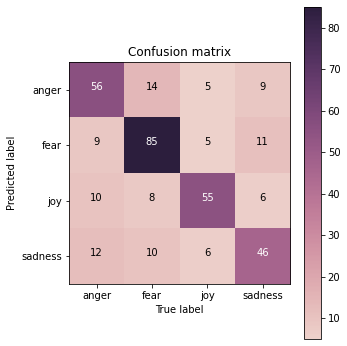

In [44]:
from sklearn.metrics import confusion_matrix

cm_mnb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_mnb) 

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_mnb, classes=my_tags, title='Confusion matrix')

Excercise 5

The above accuracy data demonstrate that Decision Tree has a very high training accuracy ( but Multinomial Naive Bayes has a lower training accuracy.
The Decision Tree model infers rules from the training dataset by dividing it into subsets based on specified attributes ). As a result, it's common to have a high training accuracy because the tree might be seen to be representing the whole training dataset.
Naive Bayesian classifier operates on a key assumption, class conditional independence, training accuracy of is a normal and conventional outcome. Because there are relationships between variables in practice, the Naive Bayesian classifier cannot model them in this scenario.I think that's why accuacy is low.

Both the Decision Tree and the Naive Bayes Model yielded confusion matrices. Given that both models employ the identical BOW 500 vectorizer (Bag of Words with 500 features), we can see that Naive Bayes outperforms Decision Tree in terms of train/test accuracy. This indicates that the decision tree models are overfitted. Overfitting is an issue that may arise in both models; but, in the case of Decision Trees, it can be handled by pruning. Furthermore, Naive Bayes produces a higher F1-score for all labels.

In [45]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


2022-01-25 16:14:32.039465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-25 16:14:32.039501: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [46]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
# print('check label: ', label_encoder.classes_)
# print('\n## Before convert')
# print('y_train[0:4]:\n', y_train[0:4])
# print('\ny_train.shape: ', y_train.shape)
# print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)


In [47]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [48]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

model_input = Input(shape=(input_shape, )) 
X = model_input

X_W1 = Dense(units=64)(X)  
H1 = ReLU()(X_W1)

H1_W2 = Dense(units=64)(H1)  
H2 = ReLU()(H1_W2)

H2_W3 = Dense(units=output_shape)(H2) 
H3 = Softmax()(H2_W3)

model_output = H3

model = Model(inputs=[model_input], outputs=[model_output])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2022-01-25 16:14:36.159811: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-25 16:14:36.159858: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (apoorv): /proc/driver/nvidia/version does not exist
2022-01-25 16:14:36.160969: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/home/apoorv/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



113/113 [==============================] - 2s 5ms/step - loss: 1.3174 - accuracy: 0.3864 - val_loss: 1.2615 - val_accuracy: 0.4640
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9621 - accuracy: 0.6665 - val_loss: 0.9001 - val_accuracy: 0.6686
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7896 - val_loss: 0.7731 - val_accuracy: 0.7118
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8397 - val_loss: 0.7664 - val_accuracy: 0.7032
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8835 - val_loss: 0.7925 - val_accuracy: 0.7089
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2792 - accuracy: 0.8987 - val_loss: 0.8229 - val_accuracy: 0.6974
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9195 - val_loss: 0.8761 - val_accuracy: 0.6888
Epoch 8/25
113/11

In [50]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[3.68223973e-02, 1.00821115e-01, 7.96865225e-01, 6.54912665e-02],
       [9.99959469e-01, 2.00448794e-05, 1.99673764e-07, 2.03242816e-05],
       [9.98253524e-01, 6.20904379e-04, 1.08951919e-11, 1.12546678e-03],
       [7.15872884e-01, 1.32270611e-06, 2.83571571e-01, 5.54249273e-04],
       [8.65733102e-02, 8.72252524e-01, 7.10633118e-04, 4.04635556e-02]],
      dtype=float32)

In [51]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.386383,1.317387,0.463977,1.261484
1,1,0.666482,0.962111,0.668588,0.900054
2,2,0.789648,0.575461,0.711816,0.773088
3,3,0.839745,0.426172,0.703170,0.766350
4,4,0.883476,0.336714,0.708934,0.792529
5,5,0.898699,0.279219,0.697406,0.822923
6,6,0.919457,0.233291,0.688761,0.876052
7,7,0.934404,0.200217,0.674352,0.928804
8,8,0.947135,0.173729,0.665706,0.991864
9,9,0.952671,0.147854,0.674352,1.038061


# EXCERCISE 6

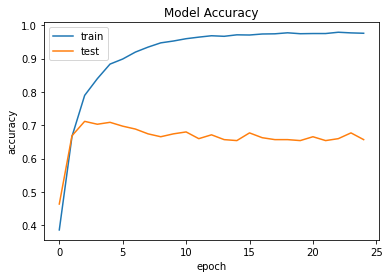

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

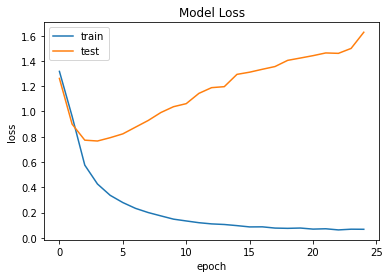

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In terms of experience, changes in learning performance over time.
Determine whether a model is underfit, overfit, or well-fit. , To determine if the train and validation datasets are representative of the issue domain, The preceding graphs indicate that this model has an overfitting problem. 


The training loss lowers as the number of epochs grows, whereas the validation loss falls at first and subsequently climbs considerably. This is the point in the model where the overfitting issue first appeared.

The accuracy curve shows how accurate the model is. The better the model, the higher the accuracy. The precision of training improves dramatically at first, but subsequently plateaus. The validation accuracy rises at first, but subsequently falls as the number of epochs rises. Overfitting is indicated by a decrease in validation accuracy.

In [55]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/home/apoorv/Downloads/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [56]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

# Excercise 7 

There could be several things that could be performed one of could be calculating average vector of all words by using word2vec where the average would be our sentence vector also we could take the vector and multiply it by TFIDF and then take the average also after that using sentence vector as input data  to train our model.

There might be  ways to get sentence vector more easily maybe just like averaging to all words to get sentence features however which definitely wont be good.


# Excercise 8 

In [57]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]       
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]       
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]       
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]       


target_words = angry_words + happy_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


/home/apoorv/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/apoorv/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/home/apoorv/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



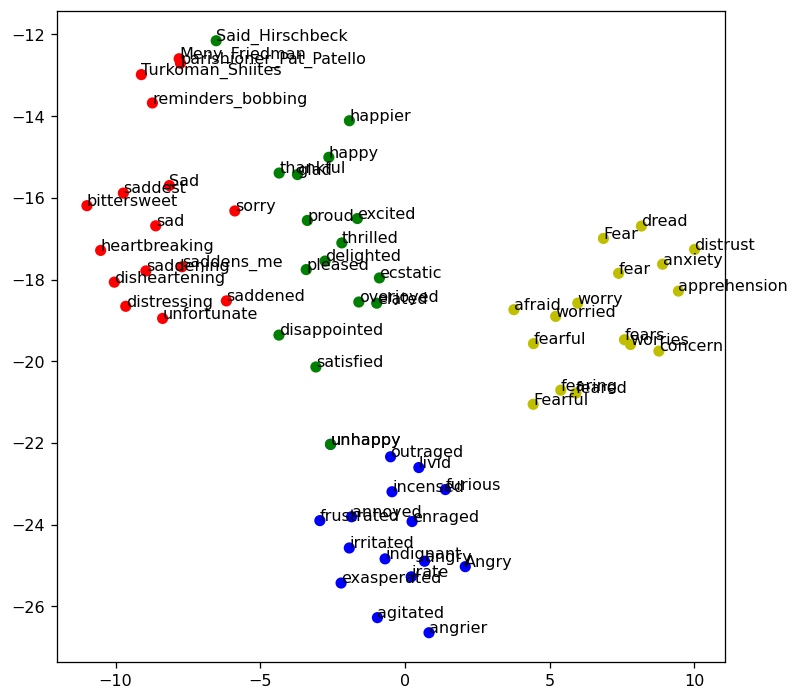

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = w2v_google_model

size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 2 Kaggle 

In [65]:
from pandas import json_normalize

In [14]:
#reading dataset
emotion=pd.read_csv("emotion.csv")
identity=pd.read_csv("data_identification.csv")
raw_data=pd.read_json("tweets_DM.json",lines=True)
tweets=json_normalize(raw_data['_source'])

In [15]:
#exploring dataset

In [16]:
identity.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [17]:
tweets.head()

,tweet.hashtags,tweet.tweet_id,tweet.text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [18]:
tweets.shape

(1867535, 3)

In [19]:
emotion.shape

(1455563, 2)

In [20]:
#data cleaning
tweets=tweets.rename(index=str,columns = {"tweet.text":"text","tweet.tweet_id":"tweet_id","tweet.hashtags":"hashtags"})
tweets=pd.merge(tweets,identity,on="tweet_id")
train_df=tweets[tweets["identification"]=="train"]
test_df=tweets[tweets["identification"]=="test"]
train_df=pd.merge(train_df,emotion,on="tweet_id")
test_df=test_df.reindex(columns=test_df.columns.tolist()+['emotion'])
train_df.drop(columns=["identification"],inplace=True)
test_df.drop(columns=["identification"],inplace=True)
train_df.set_index("tweet_id",inplace=True)
test_df.set_index("tweet_id",inplace=True)

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import re 
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus  import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /home/apoorv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/apoorv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
#tokenize
def clean_text(tweet):
    lem=WordNetLemmatizer() 
    tweet = re.sub("@[\w\d]+","",tweet)
    tweet = tweet.lower()
    tokens = nltk.tokenize.word_tokenize(tweet)
    tokens = [lem.lemmatize(token) for token in tokens if not token in stop_words]
    tokens = [token if len(token)>1 else token.replace(token,"")for token in tokens]
    tokens = ' '.join(tokens)
    return tokens


In [24]:
train_df['content'] = train_df['text'].map(lambda x : clean_text(x))

In [25]:
# Using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_16969 = TfidfVectorizer(max_features=16969, tokenizer=nltk.word_tokenize)
TFIDF_16969.fit(train_df['content']) 
train_data_TFIDF_features_16969 = TFIDF_16969.transform(train_df['content'])
train_data_TFIDF_features_16969.shape

/home/apoorv/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(1455563, 16969)

In [26]:
feature_names_16969 = TFIDF_16969.get_feature_names()

/home/apoorv/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [27]:
test_df['content'] = test_df['text'].map(lambda x: clean_text(x))

In [28]:
X_train = TFIDF_16969.transform(train_df['content']) 
y_train = train_df['emotion']
X_test = TFIDF_16969.transform(test_df['content'])
y_test = test_df['emotion']

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics 
from sklearn.metrics import classification_report

In [30]:
#model
mnb=MultinomialNB() 
mnb=mnb.fit(X_train,y_train)
y_train_pred_mnb=mnb.predict(X_train)
y_test_pred_mnb=mnb.predict(X_test)

In [31]:
test_df['emotion']=y_test_pred_mnb
test_df.drop(columns=['hashtags','text','content'],inplace=True)
test_df.index.rename('id',inplace=True)
test_df.columns=['emotion']

In [32]:
#submission_File
test_df.to_csv('submissionfile.csv')